In [18]:
import os
import numpy as np
import pandas as pd
import urllib
import zipfile
import xmltodict

DATA_PATH = "./German-Political-Speeches-Corpus"

REMOTE_DATASETS = ["Bundesregierung.xml", "AuswärtigesAmt.xml", "Bundespräsidenten.xml", "Bundestagspräsidenten.xml"]
rows = []
for REMOTE_DATASET in REMOTE_DATASETS:
    xml_path = os.path.join(DATA_PATH, REMOTE_DATASET) 
    with open(xml_path, mode="rb") as file:
        xml_document = xmltodict.parse(file)
        text_nodes = xml_document['collection']['text']
        
        for t in text_nodes:
            if "-" in t['@datum']:
                date = int(t['@datum'].split("-")[0])
            elif "." in t['@datum']:
                if len(t['@datum'].split(".")) < 3:
                    date = int(t['@datum'].split()[-1])
                else:
                    date = int(t['@datum'].split(".")[-1])

            else:
                date = int(t['@datum'].split()[-1])
            rows.append([t['@person'],t['rohtext'],date])

df = pd.DataFrame(rows, columns=["person", "speech", "year"])
df

,person,speech,year
0,Gerhard Schröder,"es ist angekündigt worden, man sollte im Beruf...",2002
1,Julian Nida-Rümelin,"Frau Präsidentin! An Sie gerichtet, Herr Börn...",2002
2,Gerhard Schröder,Frage (Peter Hahne): Bevor wir uns über den Au...,2002
3,Gerhard Schröder,"Einen Satz von Ihnen, Herr Dr. Bernotat, habe ...",2005
4,Gerhard Schröder,diese Jahresversammlung der Hochschulrektorenk...,2000
...,...,...,...
6680,Wolfgang Thierse,"""Als im Frühjahr 1943 verstohlen die Mitteilun...",2003
6681,Wolfgang Thierse,Bronzegießerei Loevy - dieser Firmenname war A...,2003
6682,Wolfgang Thierse,50 Jahre nach dem Arbeiteraufstand vom 17. Jun...,2003
6683,Wolfgang Thierse,Ein Friedenspreis ist zu verleihen und zugleic...,2003


In [20]:
df["du_count"] = df.apply(lambda x: sum([i.lower().split().count('du') for i in x if isinstance(i, str)]), axis=1)
df["ihr_count"] = df.apply(lambda x: sum([i.lower().split().count('ihr') for i in x if isinstance(i, str)]), axis=1)
df["sie_count"] = df.apply(lambda x: sum([i.lower().split().count('sie') for i in x if isinstance(i, str)]), axis=1)
df = df.groupby('year', as_index=False)[['sie_count', "du_count", "ihr_count"]].sum()
df.to_csv("./german_sie_du_counts.csv", index=False)


In [21]:
df

,year,sie_count,du_count,ihr_count
0,1982,52,0,7
1,1983,275,0,44
2,1984,408,0,44
3,1985,215,0,52
4,1986,147,0,28
5,1987,113,0,13
6,1988,225,1,21
7,1989,184,0,20
8,1990,141,0,26
9,1991,428,2,56


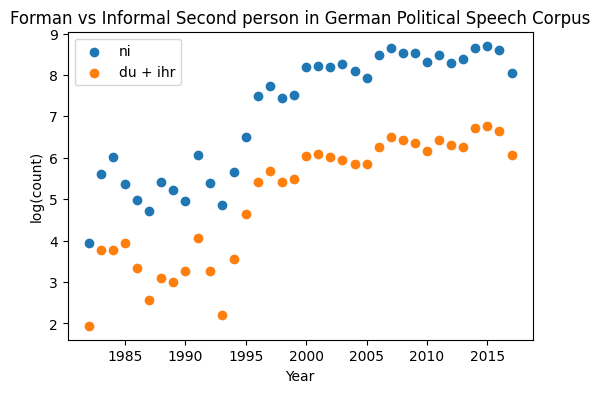

In [27]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax=plt.subplots(figsize=(6, 4))


ax.scatter(x=df.year, y=np.log(df.sie_count), label='ni')
ax.scatter(x=df.year, y=np.log(df.du_count + df.ihr_count), label='du + ihr')

plt.legend()
ax.set_xlabel("Year")
ax.set_ylabel("log(count)")

ax.set_title('Forman vs Informal Second person in German Political Speech Corpus')
plt.show()

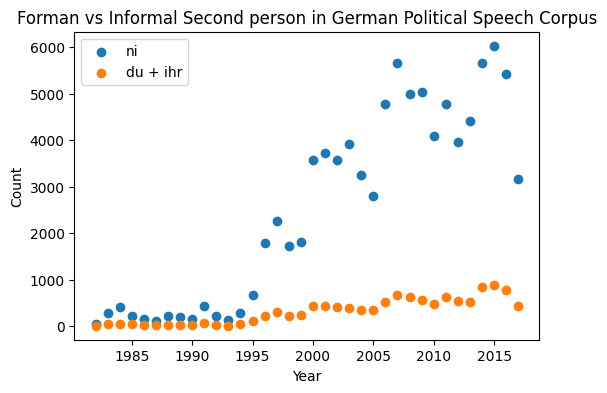

In [26]:
import matplotlib.pyplot as plt
import numpy as np
fig,ax=plt.subplots(figsize=(6, 4))


ax.scatter(x=df.year, y=df.sie_count, label='ni')
ax.scatter(x=df.year, y=df.du_count + df.ihr_count, label='du + ihr')

plt.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Count")

ax.set_title('Forman vs Informal Second person in German Political Speech Corpus')
plt.show()